# Arduino PID Control Tutorial

__Table of Contents__
1. Arduino PID Control Tutorial
2. What is the PID?
3. Proportional Control
4. Integral Control
5. Derivative Control
6. Implementation of PID in code
7. Arduino PID Library


In control systems, a controller corrects the output of a particular system to a
desired input in the presence of errors and disturbances. The most popular type of controller is PID, which is an acronym for Proportional, Integral and Derivative (Proportional, Integral and Derivative). In this Arduino PID control tutorial, we will show you, how you can use this type of controller in your project.

## What is a PID control?

As mentioned earlier, PID is short for Proportional, Integral, and Derivative. The name comes from the methods of how this controller handles disturbances in the system. however, this type of controller is only found in feedback systems. We suggest reading a material written specifically for this topic, but We will do our best to explain it here as simply as possible.

A feedback system is a system in which part of the output is "feedback" to the input. For example, you can have a project that controls the fire in the oven. Below we have a simple illustration:

<br><br/>
<p align="center"><img src="images/Control_de_temperatura_con_PID.jpg" style="width:50%"></p>
<center> Figure 1.$\quad$ Temperature control with PID. </center>
<br><br/>
<br><br/>

You want to keep the temperature in the oven until a certain point of arrival. A sensor installed in the oven determines the temperature at any time. This sensor, in this case, provides the feedback as a reference on the increase or decrease of the required temperature. The difference between the feedback sensor value and a temperature set point is the error.

## On-Off Control

To give you an idea of the basic principles of PID, let’s compare On-Off control and PID. The most basic and straightforward method for controlling a system is the On-Off method. Most HVAC systems, refrigerators use this method. For example in a fridge, it cools the inside until the desired temperature is reached, and then turn off the cooler, until it reaches a set amount above the desired temperature. See the diagram below:



<br><br/>
<p align="center"><img src="images/on-off-control.jpg" style="width:50%"></p>
<center> Figure 3.$\quad$ On-Off Control. </center>
<br><br/>
<br><br/>

## How PID Control is Different

PID control uses a different approach and achieves a better result. Let’s go back to our fridge example, instead of turning the cooling unit fully on and fully off, a PID controller will adjust how hard the cooling unit is working to that the temperature stays as close as possible to the desired value, with little variation:



<br><br/>
<p align="center"><img src="images/pid_performance.png" style="width:50%"></p>
<center> Figure 3.$\quad$ PID Controller Performance. </center>
<br><br/>
<br><br/>



Under the hood, what it’s doing is finding the difference (a.k.a error) between the desired temperature and the actual measured temperature, and then determining how much heating/cooling to apply to get it to our desired temperature while minimizing the overshot. So 3 “simple” words: Proportional, Integral and Derivative. Useful, right? 

## Proportional Control

Proportional control refers to a review that is proportional to the magnitude of the error. Let's say the controller in our example is an electronic valve to control the fuel to the furnace. If the error is small, the valve will release a small amount of fuel to match the set point and feedback. If the error is large, the valve should release more fuel.

## Integral Control

Proportional control produces a shift in its correction due to disturbances. The Integral controller has the ability to eliminate this offset and reset the error to zero. This controller produces an adjustment that is based on the accumulated error over time. Without comprehensive monitoring, the system cannot cope with error trends.

Using our example above, a drift may be present when the fuel valve did not return to its original position when its fuel output was increased and then decreased. The integral controller will detect this and turn the fuel valve to its original position.

## Derivative Control

Finally, the Derivatives control deals with the rate of change of the error. If the integral control examines the history of the error, the derived control predicts the error. Basically, the amount of correction will be based on how quickly the error changes. This type of controller works best with dynamic errors that proportional and integral controllers cannot deal with.

Let's say the temperature in the oven goes from 130 ° C to 140 ° C against a set point of 120 ° C in 2 seconds. The proportional and integral controllers will respond to the magnitude of the error, but they will have a hard time catching up on how quickly the error occurred. The derivative controller can deal with this because it has been observing the rate of change of the error from the beginning.

## A feedback system with a PID controller:

<br><br/>
<p align="center"><img src="images/sistema-de-retroalimentación-con-un-controlador-PID.jpg" style="width:70%"></p>
<center> Figure 2.$\quad$ Feedback System with a PID Controller. </center>
<br><br/>
<br><br/>

Here the input variable or set point is $r (t)$, the output variable is $y (t)$, the controlled variable is $u(t)$ and the error is $e(t)$. Continuing with our oven example, $r(t)$ would be the desired temperature and $y(t)$ is the actual temperature; $\mathrm{e}(\mathrm{t})$ is the difference between the desired temperature and the actual temperature; $u(t) $ is the sum of the corrections of the PID controllers that is fed to the plant that is the fuel valve.

Please note that a PID controller cannot be used out of the box. Tuning must be done to ensure the desired performance is achieved. This is done by carefully changing the constants $\mathrm {K}$ as shown in the diagram above. These constants must be determined in advance and modified based on the actual response of the system until optimal values are reached.

PID control is a great tool to have in your toolbelt since it’s the foundation of a bunch of cool applications where minimal variation of the system is critical. For example, flight controllers, incubators, levitating ping-pong balls, cruise control, soldering irons and much more!

## PID implementation in code

To implement a PID controller in an Arduino code or program, five parameters must be known: proportional, integral and derivative constants, input value, and arrival value.

The PID calculation must be within a loop function. The first part of the function should be to determine the elapsed time. On Arduino, the current time can be determined by ___millis ()___ and the elapsed time is just:

In [8]:
currentTime = millis();
elapsedTime = currentTime - previousTime;

NameError: name 'millis' is not defined

Next, the error must be determined:

In [ ]:
error = setPoint - input;

Remember that the integral of the error is the cumulative error in time:

In [ ]:
cumError += error * elapsedTime;

The derivative of the error is the rate of change of the error:

In [ ]:
rateError = (error - lastError)/elapsedTime;

Lastly, the calculated output is:

In [ ]:
output = Kp * error + Ki * cumError + Kd * rateError;

Here, the Kp, Ki, and Kd are the default constants.

Finally, the variables must be annotated for the next iteration:

In [ ]:
lastError = error;
previousTime = currentTime;

Let's try a more concrete example. Imagine a wheel attached to a motor. We want the wheel to remain in the indicated position:

<br><br/>
<p align="center"><img src="images/ejemplo-PID-rueda.jpg" style="width:50%"></p>
<center> Figure 3.$\quad$ Example of a PID Controller. </center>
<br><br/>
<br><br/>

A rotary encoder on the wheel gives the angle in degrees of the current position of the wheel. At the desired position of the wheel, the angle is zero.

What we want is for the motor to turn when the wheel is out of position. In addition, the motor is controlled through pulse width modulation. The wider the pulse, the further the motor spins.

Next, let's implement this simple control system using an Arduino. Here is the code:

In [ ]:
//PID constants
double kp = 2
double ki = 5
double kd = 1

unsigned long currentTime, previousTime;
double elapsedTime;
double error;
double lastError;
double input, output, setPoint;
double cumError, rateError;

void setup(){}

void loop(){
input = analogRead(A0); //read from rotary encoder connected to A0
output = computePID(input);
delay(100);
analogWrite(3, output); //control the motor based on PID value

}

double computePID(double inp){
currentTime = millis(); //get current time
elapsedTime = (double)(currentTime - previousTime); //compute time elapsed from previous computation

error = Setpoint - inp; // determine error
cumError += error * elapsedTime; // compute integral
rateError = (error - lastError)/elapsedTime; // compute derivative

double out = kp*error + ki*cumError + kd*rateError; //PID output

lastError = error; //remember current error
previousTime = currentTime; //remember current time

return out; //have function return the PID output
}

In the loop function, the rotary encoder determines the current position of the wheel and its output value becomes a parameter for the computePID () function. This function returns a value to control the motor using PWM.

## Arduino PID Library

We can further simplify the use of PIDs in Arduino projects with the help of Brett Beauregard's PID library. The library only requires you to specify the values ​​of kd, ki, kp and setpoint and you are good to go.

Here is the PID_Basic.ino code that comes with the library. This code basically provides the same output as the code we provided above, but better:

In [ ]:
#include <PID_v1.h>

#define PIN_INPUT 0
#define PIN_OUTPUT 3

//Define Variables we'll be connecting to
double Setpoint, Input, Output;

//Specify the links and initial tuning parameters
double Kp=2, Ki=5, Kd=1;
PID myPID(&Input, &Output, &Setpoint, Kp, Ki, Kd, DIRECT);

void setup()
{
//initialize the variables we're linked to
Input = analogRead(PIN_INPUT);
Setpoint = 100;

//turn the PID on
myPID.SetMode(AUTOMATIC);
}

void loop()
{
Input = analogRead(PIN_INPUT);
myPID.Compute();
analogWrite(PIN_OUTPUT, Output);
}

Here you can create a PID class and have as parameters the input, output, setpoint and k constants. To calculate the PID, just call the Compute () function. It also contains a SetMode () function that enables (AUTOMATIC) or disables (MANUAL) the PID. The complete list of functions used by the library can be found here [Arduino PID Library](https://playground.arduino.cc/Code/PIDLibrary/).

We have said that the above code is better than the one provided because it _"suppose to consider"_ the limitations of the PID which is beyond the scope of this tutorial.

<br><br/>
<p align="center"><img style="float: right; margin: 0px 0px 15px 15px;" src="images/Digital_PID_controller.png" style="width:70%"></p>
<center> Figure 4.$\quad$ Digitally Controlled Switched-Mode Power Converter. </center>
<br><br/>
<br><br/>


# Dynamic Simulation in Python

A step response is a common evaluation of the dynamics of a simulated system. A linear time invariant (LTI) system can be described equivalently as a transfer function, a state space model, or solved numerically with and ODE integrator. This tutorial shows how to simulate a first and second order system in Python.

## Generic First Order System Simulation
Consider a first order differential equation with constants $K_{p}=3$ and $\tau_{p}=2$, input $u$, and output response $y$

$$
\tau_{p} \frac{d y}{d t}=-y+K_{p} u
$$

Three methods to represent this differential equation is as a 

*  1. Transfer Function

$$
\frac{Y(s)}{U(s)}=\frac{K_{p}}{\tau_{p} s+1}
$$



* 2. State Space Model

$$
\begin{aligned}
\dot{x} &=A x+B u \\
y &=C x+D u \\
A=-\frac{1}{\tau_{p}} \quad B &=\frac{K_{p}}{\tau_{p}} \quad C=1 \quad D=0
\end{aligned}
$$



* 3. Semi-Explicit Differential Equation

$$
\frac{d y}{d t}=-\frac{1}{\tau_{p}} y+\frac{K_{p}}{\tau_{p}} u
$$

Source code is included below to simulate a step response in these three forms.

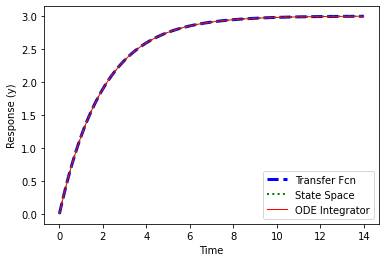

In [12]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Simulate taup * dy/dt = -y + K*u
Kp = 3.0
taup = 2.0

# (1) Transfer Function
num = [Kp]
den = [taup,1]
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1)

# (2) State Space
A = -1.0/taup
B = Kp/taup
C = 1.0
D = 0.0
sys2 = signal.StateSpace(A,B,C,D)
t2,y2 = signal.step(sys2)

# (3) DEFIRENTIAL EQUATION MODEL
def model3(y,t):
    u = 1
    return (-y + Kp * u)/taup
t3 = np.linspace(0,14,100)
y3 = odeint(model3,0,t3)

plt.figure(1)
plt.plot(t1,y1,'b--',linewidth=3,label='Transfer Fcn')
plt.plot(t2,y2,'g:',linewidth=2,label='State Space')
plt.plot(t3,y3,'r-',linewidth=1,label='ODE Integrator')
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.legend(loc='best')
plt.show()

## Generic Second Order System Simulation

* 1. Laplace Domain, Transfer Function

$$
\frac{Y(s)}{U(s)}=\frac{K_{p}}{\tau_{s}^{2} s^{2}+2 \zeta \tau_{s} s+1} e^{-\theta_{p^{8}}}
$$



* 2. State Space Form

$$
\begin{array}{c}
{\left[\begin{array}{c}
\dot{x}_{1} \\
\dot{x}_{2}
\end{array}\right]=\left[\begin{array}{cc}
0 & 1 \\
-\frac{1}{\tau_{2}^{2}} & -\frac{2 \zeta}{\tau_{s}}
\end{array}\right]\left[\begin{array}{l}
x_{1} \\
x_{2}
\end{array}\right]+\left[\begin{array}{c}
0 \\
\frac{K_{p}}{\tau_{2}^{2}}
\end{array}\right] u\left(t-\theta_{p}\right)} \\
y=\left[\begin{array}{cc}
1 & 0
\end{array}\right]\left[\begin{array}{l}
x_{1} \\
x_{2}
\end{array}\right]+[0] u
\end{array}
$$



* 3. Second Order Differential Equation

$$
\tau_{s}^{2} \frac{d^{2} y}{d t^{2}}+2 \zeta \tau_{s} \frac{d y}{d t}+y=K_{p} u\left(t-\theta_{p}\right)
$$

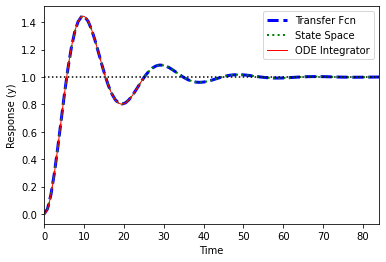

In [16]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# tau * dy2/dt2 + 2*zeta*tau*dy/dt + y = Kp*u
Kp = 1.0    # gain
tau = 3.0   # time constant
zeta = 0.25 # damping factor
theta = 0.0 # no time delay
du = 1.0    # change in u

# (1) Transfer Function
num = [Kp]
den = [tau**2,2*zeta*tau,1]
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1)

# (2) State Space
A = [[0.0,1.0],[-1.0/tau**2,-2.0*zeta/tau]]
B = [[0.0],[Kp/tau**2]]
C = [1.0,0.0]
D = 0.0
sys2 = signal.StateSpace(A,B,C,D)
t2,y2 = signal.step(sys2)

# (3) ODE Integrator
def model3(x,t):
    y = x[0]
    dydt = x[1]
    dy2dt2 = (-2.0*zeta*tau*dydt - y + Kp*du)/tau**2
    return [dydt,dy2dt2]



t3 = np.linspace(0,25,100)
x3 = odeint(model3,[0,0],t3)
y3 = x3[:,0]

plt.figure(1)
plt.plot(t1,y1*du,'b--',linewidth=3,label='Transfer Fcn')
plt.plot(t2,y2*du,'g:',linewidth=2,label='State Space')
plt.plot(t3,y3,'r-',linewidth=1,label='ODE Integrator')
y_ss = Kp * du
plt.plot([0,max(t1)],[y_ss,y_ss],'k:')
plt.xlim([0,max(t1)])
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.legend(loc='best')
plt.savefig('images/2nd_order.png')
plt.show()

## Higher Order Simulation [Under Construction...]

A simple higher order simulation is the combination of $n$ first order equations. The value of the time constant is $10/n$ in this example. The first equation is a first order differential expression.

$$
\tau \frac{d y_{1}}{d t}=-y_{1}+1
$$

Additional equations are also first order differential expressions for $i=2,3,...,n-1,n$.

$$
\tau \frac{d y_{i}}{d t}=-y_{i}+y_{i-1}
$$

# PID Controller Simulator

A simulator is a useful tool to help evaluate changes in tuning before testing on a physical system. Use the PID simulator to find acceptable control performance that minimizes the integral absolute error between the setpoint and measured temperature. 




## Python Simple PID Controller Simulator
It's a simple PID simulator in Python.</br>

You can set kp, ki, kd, setpoint, dt, and the function will return a value.</br></br>


The pid formula should be: </br></br>

$$
u(t)=K_{\mathrm{p}} e(t)+K_{\mathrm{i}} \int_{0}^{t} e(\tau) d \tau+K_{\mathrm{d}} \frac{d e(t)}{d t}
$$

And what it looks like in Python:

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.integrate import odeint



# PID Parameters
Kc   = 5.0
tauI = 120.0 # sec
tauD = 2.0   # sec

#-----------------------------------------
# PID Controller
#-----------------------------------------
# inputs ---------------------------------
# sp = setpoint
# sample = current plant sensing
# sample_last = prior plant sensing
# ierr = integral error
# dt = time increment between measurements
# outputs --------------------------------
# ctrl_op = output of the PID controller
# P = proportional contribution
# I = integral contribution
# D = derivative contribution
def pid(sp,pv,pv_last,ierr,dt):
    # Parameters in terms of PID coefficients
    KP = Kp
    KI = Kp/tauI
    KD = Kp*tauD
    # ubias for controller (initial condition)
    ctrl_op0 = 0
    # upper and lower bounds on Plant output level
    ophi = 100
    oplo = 0
    # calculate the error
    error = sp-sample
    # calculate the integral error
    ierr = ierr + KI * error * dt
    # calculate the measurement derivative
    dsample = (sample - sample_last) / dt
    # calculate the PID output
    P = KP * error
    I = ierr
    D = -KD * dsample
    ctrl_op = ctrl_op0 + P + I + D
    # implement anti-reset windup
    if ctrl_op < oplo or ctrl_op > ophi:
        I = I - KI * error * dt
        # clip output
        ctrl_op = max(oplo,min(ophi,op))
    # return the controller output and PID contribution terms
    return [ctrl_op,P,I,D]

## PID Controller Callibration

### Ziegler–Nichols method


The [Ziegler-Nichols](http://www.mstarlabs.com/control/znrule.html) tuning method is a heuristic method of tuning a PID controller. It was developed by John G. Ziegler and Nathaniel B. Nichols. It is performed by setting the $I$ (integral) and $D$ (derivative) gains to zero. The $P$ (proportional) gain, $K_{p}$ is then increased (from zero) until it reaches the ultimate gain $K_{u}$, at which the output of the control loop has stable and consistent oscillations. $K_{u}$ and the oscillation
period $T_{u}$ are then used to set the $P$, I, and D gains depending on the type of controller used and behaviour desired:

__Table. Ziegler–Nichols Method__
$$
\begin{array}{|c|c|c|c|c|c|}
\hline \text { Control Type } & K_{p} & T_{i} & T_{d} & K_{i} & K_{d} \\
\hline \mathrm{P} & 0.5 K_{\mathrm{u}} & - & - & - & - \\
\hline \mathrm{PI} & 0.45 K_{u} & T_{u} / 1.2 & - & 0.54 K_{u} / T_{u} & - \\
\hline \mathrm{PD} & 0.8 K_{u} & - & T_{u} / 8 & - & K_{u} T_{u} / 10 \\
\hline \text { classic PID }^{[2]} & 0.6 K_{u} & T_{u} / 2 & T_{u} / 8 & 1.2 K_{u} / T_{u} & 3 K_{u} T_{u} / 40 \\
\hline \text { Pessen Integral Rule }^{[2]} & 7 K_{u} / 10 & 2 T_{u} / 5 & 3 T_{u} / 20 & 1.75 K_{u} / T_{u} & 21 K_{u} T_{u} / 200 \\
\hline \text { some overshoot }[2] & K_{u} / 3 & T_{u} / 2 & T_{u} / 3 & 0.666 K_{u} / T_{u} & K_{u} T_{u} / 9 \\
\hline \text { no overshoot }[2] & K_{u} / 5 & T_{u} / 2 & T_{u} / 3 & (2 / 5) K_{u} / T_{u} & K_{u} T_{u} / 15 \\
\hline
\end{array}
$$

The ultimate gain $\left(K_{u}\right)$ is defined as $1 / \mathrm{M},$ where $\mathrm{M}=$ the amplitude ratio, $K_{i}=K_{p} / T_{i}$ and $K_{d}=K_{p} T_{d}$
These 3 parameters are used to establish the correction $u(t)$ from the error $e(t)$ via the equation:

$$
u(t)=K_{p}\left(e(t)+\frac{1}{T_{i}} \int_{0}^{t} e(\tau) d \tau+T_{d} \frac{d e(t)}{d t}\right)
$$
which has the following transfer function relationship between error and controller output:
$$
u(s)=K_{p}\left(1+\frac{1}{T_{i} s}+T_{d} s\right) e(s)=K_{p}\left(\frac{T_{d} T_{i} s^{2}+T_{i} s+1}{T_{i} s}\right) e(s)
$$

<br><br/>
<p align="center"><img style="float: center; margin: 0px 0px 15px 15px;" src="images/pid_performance.png" style="width:70%"></p>
<center> Figure.$\quad$ PID in time domine performance. </center>
<br><br/>
<br><br/>

## PID Tuning

A PID controller takes in parameters that affect it’s responsiveness and, consequently, how much it overshoots the set-point. Notice the three different lines in the diagram above? Each of them have different tuning parameters. Usually, it requires a little bit of experimentation to tune a PID controller for your use case.



<br><br/>
<p align="center"><img style="float: center; margin: 0px 0px 15px 15px;" src="images/pid_tuning.png" style="width:70%"></p>
<center> Figure.$\quad$ PID tuning. </center>
<br><br/>
<br><br/>

### General Effect due to Gain Changing

$$
\begin{array}{llll}
\text { PID Gain } & \text { Percent } & & \text { Steady-State } \\
& \text { Overshoot } & \text { Settling Time } & \text { Error } \\
\hline \text { Increasing } K_{P} & \text { Increases } & \text { Minimal impact } & \text { Decreases } \\
\text { Increasing } K_{i} & \text { Increases } & \text { Increases } & \text { Zero steady-state error } \\
\text { Increasing } K_{D} & \text { Decreases } & \text { Decreases } & \text { No impact } \\
\hline
\end{array}
$$

### Ziegler-Nichols Method Evaluation
The Ziegler-Nichols tuning (represented by the 'Classic PID' equations in the table above) creates a "quarter wave decay". This is an acceptable result for some purposes, but not optimal for all applications.

This tuning rule is meant to give PID loops best disturbance rejection.

It yields an aggressive gain and overshoot - some applications wish to instead minimize or eliminate overshoot, and for these this method is inappropriate. In this case, the equations from the row labelled 'no overshoot' can be used to compute appropriate controller gains.

## PID Controller Callibration  [Type I]

Using just the $K_p$ parameter, and the integral and derivative time contants [$\tau_i$, $\tau_d$]

In [17]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as wg
from IPython.display import display

n = 1301 # time points to plot
tf = n - 1.0 # final time

# Temp Control Lab FOPDT 
# [TCLab](https://www.amazon.com/TCLab-Laboratorio-Control-Temperatura/dp/B07GMFWMRY)
# A first-order plus deadtime (FOPDT) model is a simple 
# approximation of the dynamic response (the transient 
# or time-response) of a process variable to an influence. 
# It's also called first-order lag plus deadtime (FOLPDT), 
# or “deadtime” may be replaced with “delay,” 
# changing the acronym to FOLPD.

K_plant = 0.9
tau_plant = 175.0
theta_plant = 15.0

ramp    = lambda m,x_init,y_init,t: m*(t-x_init) + y_init
sinwave = lambda A,offset,t: A*np.sin(t)+offset


def process(y,t,u):
    dydt = (1.0/tau_plant) * (-(y-23.0) + K_plant * u)
    return dydt

def pidPlot(Kc,tauI,tauD):
    y0 = 23.0                # initial condition
    t  = np.linspace(0,tf,n) # create time vector
    P  = np.zeros(n)         # initialize proportional term
    I  = np.zeros(n)         # initialize integral term
    D  = np.zeros(n)         # initialize derivative term
    e  = np.zeros(n)         # initialize error
    OP = np.zeros(n)         # initialize controller output
    PV = np.ones(n)*y0       # initialize process variable
    SP = np.ones(n)*y0       # initialize setpoint and create a segmented continues function
    SP[10:100]   = ramp(((50-y0)/90),10.0,y0,np.linspace(10, 100, 90))          # ramp up
    SP[100:300]  = 50.0                                                         # step up
    SP[300:600]  = ramp(((40-50)/300),300.0,50.0,np.linspace(300, 600, 300))    # ramp down
    SP[600:900]  = 40.0                                                         # step down 
    SP[900:1301] = sinwave(1.3,40.0,np.linspace(0,3*np.pi,401))                 # sin wave
    iae = 0.0
    
    # loop through all time steps
    for i in range(1,n):
        
        # simulate process for one time step
        ts = [t[i-1],t[i]]         # time interval
        y = odeint(process,y0,ts,args=(OP[max(0,i-int(theta_plant))],))
        y0 = y[1]                  # record new initial condition
        iae += np.abs(SP[i]-y0[0])
        
        # calculate new OP with PID
        PV[i] = y[1]                           # record PV
        e[i] = SP[i] - PV[i]                   # calculate error = SP - PV
        dt = t[i] - t[i-1]                     # calculate time step
        P[i] = Kc * e[i]                       # calculate proportional term
        I[i] = I[i-1] + (Kc/tauI) * e[i] * dt  # calculate integral term
        D[i] = -Kc * tauD * (PV[i]-PV[i-1])/dt # calculate derivative term
        OP[i] = P[i] + I[i] + D[i]             # calculate new controller output
        if OP[i]>=100:
            OP[i] = 100.0
            I[i] = I[i-1] # reset integral
        if OP[i]<=0:
            OP[i] = 0.0
            I[i] = I[i-1] # reset integral            

    # plot PID response
    plt.figure(1,figsize=(15,7))
    plt.subplot(2,2,1)
    plt.plot(t,SP,'k-',linewidth=2,label='Setpoint (SP)')
    plt.plot(t,PV,'r:',linewidth=2,label='Temperature (PV)')
    plt.ylabel(r'T $(^oC)$')
    plt.text(100,34,'Integral Abs Error:' + str(np.round(iae,2)))
    plt.text(400,31,r'$K_c$: ' + str(np.round(Kc,0)))  
    plt.text(400,28,r'$\tau_I$: ' + str(np.round(tauI,0)) + ' sec')  
    plt.text(400,25,r'$\tau_D$: ' + str(np.round(tauD,0)) + ' sec')  
    plt.legend(loc='best')
    plt.subplot(2,2,2)
    plt.plot(t,P,'g.-',linewidth=2,label=r'Proportional = $K_c \; e(t)$')
    plt.plot(t,I,'b-',linewidth=2,label=r'Integral = ' + \
             r'$\frac{K_c}{\tau_I} \int_{i=0}^{n_t} e(t) \; dt $')
    plt.plot(t,D,'r--',linewidth=2,label=r'Derivative = ' + \
             r'$-K_c \tau_D \frac{d(PV)}{dt}$')  
    plt.legend(loc='best')
    plt.subplot(2,2,3)
    plt.plot(t,e,'m--',linewidth=2,label='Error (e=SP-PV)')
    plt.ylabel(r'$\Delta T$ $(^oC)$')
    plt.legend(loc='best')
    plt.subplot(2,2,4)
    plt.plot(t,OP,'b--',linewidth=2,label='Heater (OP)')
    plt.legend(loc='best')
    plt.xlabel('time')

# Sliders
Kc_slide = wg.FloatSlider(value=5.0,min=0.0,max=50.0,step=0.5)
tauI_slide = wg.FloatSlider(value=100.0,min=20.0,max=180.0,step=5.0)
tauD_slide = wg.FloatSlider(value=3.51,min=0.0,max=20.0,step=0.01)
wg.interact(pidPlot, Kc=Kc_slide, tauI=tauI_slide, tauD=tauD_slide)
print('PID Simulator: Adjust Kc, tauI, and tauD to achieve lowest Integral Abs Error')

interactive(children=(FloatSlider(value=5.0, description='Kc', max=50.0, step=0.5), FloatSlider(value=100.0, d…

PID Simulator: Adjust Kc, tauI, and tauD to achieve lowest Integral Abs Error


## PID Controller Callibration  [Type II]

Using directly the $K_p$, $K_i$, $K_d$ values

In [19]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as wg
from IPython.display import display

n = 1301 # time points to plot
tf = n - 1.0 # final time

# Temp Control Lab FOPDT 
# [TCLab](https://www.amazon.com/TCLab-Laboratorio-Control-Temperatura/dp/B07GMFWMRY)
# A first-order plus deadtime (FOPDT) model is a simple 
# approximation of the dynamic response (the transient 
# or time-response) of a process variable to an influence. 
# It's also called first-order lag plus deadtime (FOLPDT), 
# or “deadtime” may be replaced with “delay,” 
# changing the acronym to FOLPD.
K_plant = 0.9
tau_plant = 175.0
theta_plant = 15.0


ramp    = lambda m,x_init,y_init,t: m*(t-x_init) + y_init
sinwave = lambda A,offset,t: A*np.sin(t)+offset

def process(y,t,u):
    dydt = (1.0/tau_plant) * (-(y-23.0) + K_plant * u)
    return dydt

def pidPlot(Kp,Ki,Kd):
    y0 = 23.0               # initial condition
    t = np.linspace(0,tf,n) # create time vector
    P = np.zeros(n)         # initialize proportional term
    I = np.zeros(n)         # initialize integral term
    D = np.zeros(n)         # initialize derivative term
    e = np.zeros(n)         # initialize error
    OP = np.zeros(n)        # initialize controller output
    PV = np.ones(n)*23.0    # initialize process variable
    SP = np.ones(n)*23.0    # initialize setpoint
    SP[10:100]   = ramp(((50-y0)/90),10.0,y0,np.linspace(10, 100, 90))          # ramp up
    SP[100:300]  = 50.0                                                         # step up
    SP[300:600]  = ramp(((40-50)/300),300.0,50.0,np.linspace(300, 600, 300))    # ramp down
    SP[600:900]  = 40.0                                                         # step down 
    SP[900:1301] = sinwave(1.3,40.0,np.linspace(0,3*np.pi,401))                 # sin wave
    iae = 0.0 

    # loop through all time steps
    for i in range(1,n):
        # simulate process for one time step
        ts = [t[i-1],t[i]]         # time interval
        y = odeint(process,y0,ts,args=(OP[max(0,i-int(theta_plant))],))
        y0 = y[1]                  # record new initial condition
        iae += np.abs(SP[i]-y0[0])
        # calculate new OP with PID
        PV[i] = y[1]               # record PV
        e[i] = SP[i] - PV[i]       # calculate error = SP - PV
        dt = t[i] - t[i-1]         # calculate time step
        P[i] = Kp * e[i]           # calculate proportional term
        I[i] = I[i-1] + (Ki) * e[i] * dt  # calculate integral term
        D[i] = -Kd * (PV[i]-PV[i-1])/dt # calculate derivative term
        OP[i] = P[i] + I[i] + D[i] # calculate new controller output
        if OP[i]>=100:
            OP[i] = 100.0
            I[i] = I[i-1] # reset integral
        if OP[i]<=0:
            OP[i] = 0.0
            I[i] = I[i-1] # reset integral            

    # plot PID response
    plt.figure(1,figsize=(15,7))
    plt.subplot(2,2,1)
    plt.plot(t,SP,'k-',linewidth=2,label='Setpoint (SP)')
    plt.plot(t,PV,'r:',linewidth=2,label='Temperature (PV)')
    plt.ylabel(r'T $(^oC)$')
    plt.text(100,34,'Integral Abs Error:' + str(np.round(iae,2)))
    plt.text(400,31,r'$K_c$: ' + str(np.round(Kp,0)))  
    plt.text(400,28,r'$K_i$: ' + str(np.round(Ki,0)) + ' sec')  
    plt.text(400,25,r'$K_d$: ' + str(np.round(Kd,0)) + ' sec')  
    plt.legend(loc='best')
    plt.subplot(2,2,2)
    plt.plot(t,P,'g.-',linewidth=2,label=r'Proportional = $K_c \; e(t)$')
    plt.plot(t,I,'b-',linewidth=2,label=r'Integral = ' + \
             r'$\frac{K_c}{\tau_I} \int_{i=0}^{n_t} e(t) \; dt $')
    plt.plot(t,D,'r--',linewidth=2,label=r'Derivative = ' + \
             r'$-K_c \tau_D \frac{d(PV)}{dt}$')  
    plt.legend(loc='best')
    plt.subplot(2,2,3)
    plt.plot(t,e,'m--',linewidth=2,label='Error (e=SP-PV)')
    plt.ylabel(r'$\Delta T$ $(^oC)$')
    plt.legend(loc='best')
    plt.subplot(2,2,4)
    plt.plot(t,OP,'b--',linewidth=2,label='Heater (OP)')
    plt.legend(loc='best')
    plt.xlabel('time')

# Sliders
Kc_slide = wg.FloatSlider(value=5.0,min=0.0,max=50.0,step=0.5)
tauI_slide = wg.FloatSlider(value=0.05,min=0.0,max=1.0,step=0.001)
tauD_slide = wg.FloatSlider(value=17.55,min=0.0,max=30.0,step=0.1)
wg.interact(pidPlot, Kp=Kc_slide, Ki=tauI_slide, Kd=tauD_slide)
print('PID Simulator: Adjust Kc, tauI, and tauD to achieve lowest Integral Abs Error')

interactive(children=(FloatSlider(value=5.0, description='Kp', max=50.0, step=0.5), FloatSlider(value=0.05, de…

PID Simulator: Adjust Kc, tauI, and tauD to achieve lowest Integral Abs Error


## Discrete-Time System Response

The response of a discrete-time system, the time vector t must consider the the sample time $dT$ as part of the modeling. The simulated response of a second order discrete-time system to a ramp step input is shown in the next figure.

<br><br/>
<p align="center"><img src="images/ResponseOfADiscreteTimeSystemStepedRampSignal.png" style="width:70%"></p>
<center> Figure.$\quad$ The Response of a Discrete Time System to a Steped Ramp Signal. </center>
<br><br/>
<br><br/>


For instance, the response of a discrete-time system to a sine wave is shown in the follow figure. 

<br><br/>
<p align="center"><img src="images/ResponseOfADiscreteTimeSystemSinSignal.png" style="width:70%"></p>
<center> Figure.$\quad$ The Response of a Discrete Time System to a Sine Wave. </center>
<br><br/>
<br><br/>

# Signal Processing

## Cross-Correlation

In signal processing, cross-correlation is a measure of similarity of two series as a function of the displacement
of one relative to the other. This is also known as a sliding dot product or sliding inner-product. It is commonly
used for searching a long signal for a shorter, known feature. It has applications in pattern recognition, single
particle analysis, electron tomography, averaging, cryptanalysis, and neurophysiology. The cross-correlation is
similar in nature to the convolution of two functions. In an autocorrelation, which is the cross-correlation of a
signal with itself, there will always be a peak at a lag of zero, and its size will be the signal energy.

In probability and statistics, the term cross-correlations refers to the correlations between the entries of two
random vectors $\mathbf{X}$ and $\mathbf{Y}$, while the correlations of a random vector $\mathbf{X}$ are the correlations between the entries
of $\mathbf{X}$ itself, those forming the correlation matrix of $\mathbf{X}$. If each of $\mathbf{X}$ and $\mathbf{Y}$ is a scalar random variable which is
realized repeatedly in a time series, then the correlations of the various temporal instances of $\mathbf{X}$ are known as autocorrelations of $\mathbf{X}$, and the cross-correlations of $\mathbf{X}$ with $\mathbf{Y}$ across time are temporal cross-correlations. In
probability and statistics, the definition of correlation always includes a standardising factor in such a way that
correlations have values between -1 and $+1 .$

If $X$ and $Y$ are two independent random variables with probability density functions $f$ and $g$, respectively, then the probability density of the difference $Y-X$ is formally given by the cross-correlation (in the signal-processing sense) $f \star g$; however, this terminology is not used in probability and statistics. In contrast, the convolution $f * g$ (equivalent to the cross-correlation of $f(t)$ and $g(-t)$ ) gives the probability density function of the sum $X+Y$

## Cross-Correlation of Deterministic Signals

For continuous functions $f$ and $g$, the cross-correlation is defined as:

$$
(f \star g)(\tau) \triangleq \int_{-\infty}^{\infty} \overline{f(t)} g(t+\tau) dt
$$

$$
(f \star g)(\tau) \triangleq \int_{-\infty}^{\infty} \overline{f(t-\tau)} g(t) d t
$$

where $\overline{f(t)}$ denotes the complex conjugate of $f(t),$ and $\tau$ is the displacement, also known as lag (a feature in $f$ at $t$ occurs in $g$ at $t+\tau)$.


<br><br/>
<p align="center"><img style="float: right; margin: 0px 0px 15px 15px;" src="images/Comparison_convolution_correlation.png" style="width:90%"></p>
<center> Figure.$\quad$ Comparison Convolution Correlation. </center>
<br><br/>
<br><br/>


## Explanation

As an example, consider two real valued functions $f$ and $g$ differing only by an unknown shift along the x-axis. One can use the cross-correlation to find how much $g$ must be shifted along the x-axis to make it identical to $f$. The formula essentially slides the $g$ function along the x-axis, calculating the integral of their product at each position. When the functions match, the value of $(f \star g)$ is maximized. This is because when peaks (positive areas) are aligned, they make a large contribution to the integral. Similarly, when troughs (negative areas) align, they also make a positive contribution to the integral because the product of two negative numbers is positive.

<br><br/>
<p align="center"><img style="float: right; margin: 0px 0px 15px 15px;" src="images/Cross_correlation_animation.gif" style="width:90%"></p>
<center> Figure.$\quad$ Cross Correlation Visulization [sin/cos]. </center>[1]
<br><br/>
<br><br/>

# Sistem Stability

## Laplace Stability Conditions

<br><br/>
<p align="center"><img src="images/laplace_stability_conditions.jpg" style="width:70%"></p>
<center> Figure.$\quad$ Laplace Stability Conditions. </center>
<br><br/>
<br><br/>

## Understanding Stability of a System Using Laplace Transform

<br><br/>
<p align="center"><img src="images/understand_stability_of_a_system_using_laplace_transform.jpg" style="width:50%"></p>
<center> Figure.$\quad$ Laplace Stability Conditions. </center>
<br><br/>
<br><br/>

## Laplace and Fourier Transforms [Conecting Former Related Ideas]

Examine the Fourier transform:

$$
\hat{f}(\omega)=\int_{-\infty}^{\infty} f(t) e^{-i \omega t} d x
$$

Essentially, it takes a test sine wave $\left(e^{-i \omega}\right)$ with frequency $\omega$ and determines how similar that sine wave is to your input function 1 . It determines this similarity, or "cross-correlation", by multiplying that sine wave with your input function across all time and integrates. If there is little similarity between this frequency $\omega$ and your input, then this integration will be equal to zero.

As could be observed, this test signal never changes amplitude and can only be used to examine the steady state behavior of the input.

Now compare to the Laplace transform:

$$
F(s)=\int_{0}^{\infty} f(t) e^{-s t} d t
$$

Very similar, except now $s$ is complex and replaces the real (not complex) $\omega$. In addition, the integration is now not for all time, ___but only the future.___

The neat thing about raising to a complex power $s$ is that there is both a real and an imaginary component, so that if $s=a+i b$, then $e^{-s t}=e^{-a t} e^{-i b t}$. So now we have a sine wave that either grows exponentially, shrinks exponentially, or maintains a constant amplitude depending on the value of $a$.

This test signal that can change over time, plus the fact that the integration now only starts at time 0 means that it can not be extracted the transient response from the input signal any more. $a$ and $b$ together determine a point on the complex plane (known here as the s-plane), whereas $\omega$ will always be on the real line. This is the extra degree of freedom. This point defines the test signal used by the Laplace transform, and it can be seen the effects of moving the point around the complex s-plane in this image:


<br><br/>
<p align="center"><img src="images/domain_of_Laplace_transforms.png" style="width:39%"></p>
<center> Figure.$\quad$ Domain of Laplace Transforms. </center>
<br><br/>
<br><br/>



> [1] In reality, $e^{-i \omega}=\cos x+i \sin x,$ so it's actually using both a cosine and a sine wave
simultaneously (a rotating complex point) as the test function. This is how the Fourier transform
gets phase information. That's also why the image above shows curly $3 \mathrm{D}$ spirals, since the
Laplace transform also has a rotating complex point. But it's easier to just think of it as a single
sine wave.

## An s-Plane to z-Plane Mapping Example [From Continues to Discrete Time Domines]
Given the various loci of points, a version of a correct 's-plane to z-plane mapping' diagram shown in the next Figure. "A picture is worth a thousand words." 

<br><br/>
<p align="center"><img style="float: left; margin: 0px 0px 15px 15px;" src="images/s-Plane_to_z-Plane_mapping.jpg" style="width:90%"></p>
<center> Figure.$\quad$ A Correct 's-Plane to z-Plane Conformal Mapping' diagram. </center>
<br><br/>
<br><br/>

## Domine of Z Transforms

<br><br/>
<p align="center"><img src="images/domain_of_Z_transforms.png" style="width:50%"></p>
<center> Figure.$\quad$ Domine of Z Transforms. </center>
<br><br/>
<br><br/>


While the frequency axis is unbounded in the $s$ plane, it is finite (confined to the unit circle) in the $z$ plane, which is natural because the sampling rate is finite in the discrete-time case. As in the $s$ plane, the upper-half plane corresponds to positive frequencies while the lower-half plane corresponds to negative frequencies. Inside the unit circle, we have decaying (stable) exponential envelopes, while outside the unit circle, we have growing (unstable) exponential envelopes. Along the positive real axis ( re $\{z\}>0, \quad$ im $\{z\}=0$ ), we have pure exponentials,
but along the negative real axis ( re $\{z\}<0, \quad$ im $\{z\}=0$ ), we have exponentially enveloped
sampled sinusoids at frequency $f_{s} / 2$ (exponentially enveloped alternating sequences). The
negative real axis in the $z$ plane is normally a place where all signal $z$ transforms should be zero, and all system responses should be highly attenuated, since there should never be any energy at exactly half the sampling rate (where amplitude and phase are ambiguously linked). Every point in the $z$ plane can be said to correspond to sampled generalized complex sinusoids of the form $x(n)=.4 z^{n}=\mathcal{A}\left[e^{s T}\right]^{n}, n \geq 0,$ with special cases being sampled complex

sinusoids $\mathcal{A e}^{j \omega n T}$, sampled real exponentials $A e^{\sigma n T},$ and the constant sequence $x=[1,1,1, \ldots]$ (dc). In summary, the exponentially enveloped (' generalized") complex
sinusoid is the fundamental signal upon which other signals are "projected" in order to compute a Laplace transform in the continuous-time case, or a $z$ transform in the discretetime case. As a special case, if the exponential envelope is eliminated (set to 1 ), leaving only a complex sinusoid, then the projection reduces to the Fourier transform in the continuoustime case, and either the DFT (finite length) or DTFT (infinite length) in the discrete-time case. Finally, there are still other variations, such as short-time Fourier transforms (STFT) and wavelet transforms, which utilize further modifications such as projecting onto windowed complex sinusoids.

# EXPECTING HAS BEEN NOTED THE RELATION WITH ONE DIMENSIONAL CALCULUS AND THE EXPANSION TO CALCULUS OVER MATRIX REPRESENTATIONS FOR SYSTEM MODELING [ONE OF THE REASONS THAT ALGEBRAIC OPERATIVE WERE ABORDED FROM THE BEGINNING OF THESE SET OF ROUNDS] . BUT NOT JUST THESE. AS JUST FLASHED FEW PARAGRAPHS BEFORE. ALL THE IDEAS BEFORE COULD BE EXPANDED OVER THE COMPLEX FIELD AS WELL.


# ONE LAST ASTONISHING EXPANSION THEN REMAINDS [to back and forth from maths to real word, passing through programming]

>>> ## IN ANY CASE, SUCH IDEAS ARE FOR BE TOLD, RIGHT NOW NOT.
### BUT NEVER KNOWS, MAYBE WE WILL MEET AGAIN IN ANOTHER TIME FOR MORE AWAKENING, BY SURE ...

<br><br/>
<p align="center"><img src="images/Spirule.jpg" style="width:50%"></p>
<center> Figure.$\quad$ THE SPIRULE [COMPLEX ANALYSIS COURSE]. </center>
<br><br/>
<br><br/>



